In [2]:
import mdtraj as md
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
base_path = f"Simulations/Apo/simulations/"
NN_training_dir = f"{os.getcwd()}/../ensembleFolding/exp2_enzyme_preliminary/bin/32sims"
os.makedirs(NN_training_dir, exist_ok=True)
nsims = 14

In [18]:


# === Load trajectory ===
# Protein-only DCD and structure
i = 2
sim_path = base_path + f"sim_{i:03d}/"
traj_file = sim_path + "traj.dcd"
top_file = base_path + "../protein_only.pdb"
rama_plots = base_path + f"plots/ramachadran/"
os.makedirs(rama_plots, exist_ok=True)

traj_protein = md.load(traj_file, top=top_file)


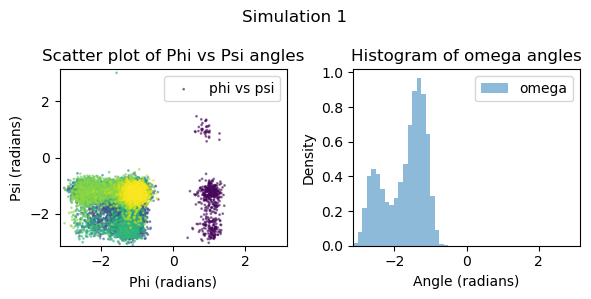

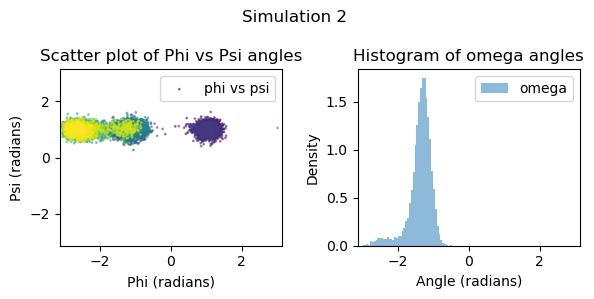

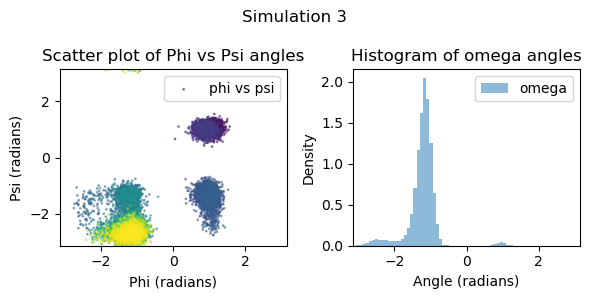

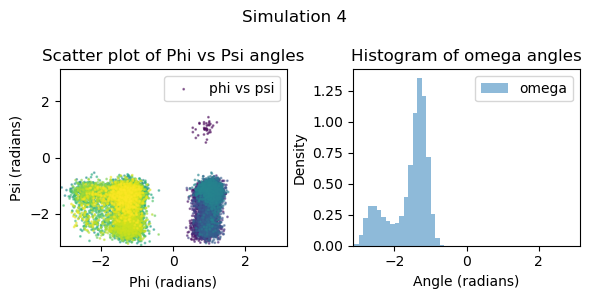

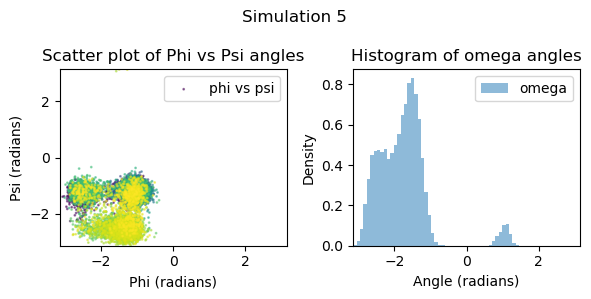

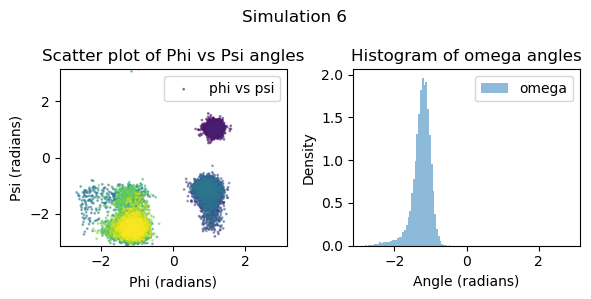

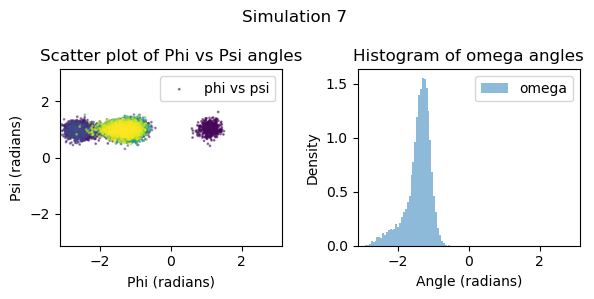

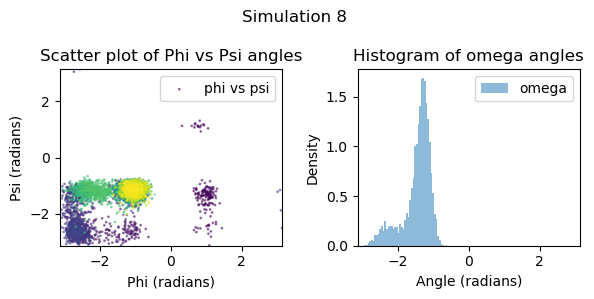

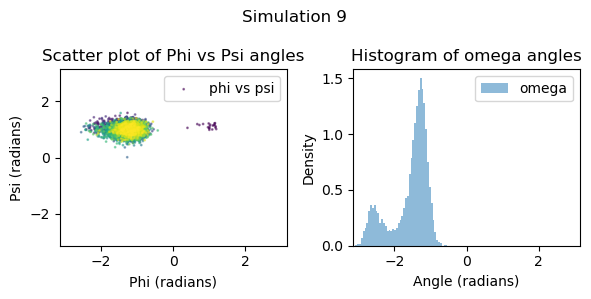

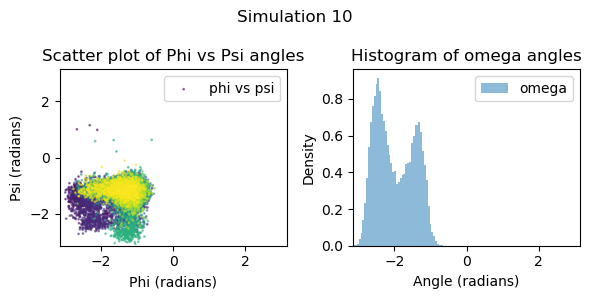

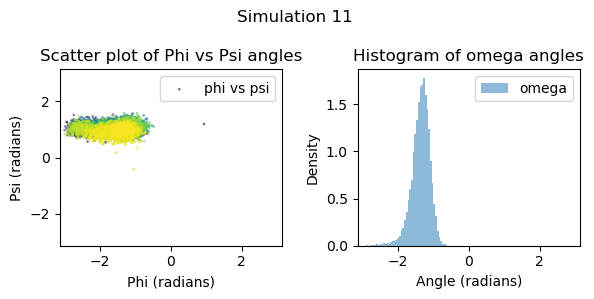

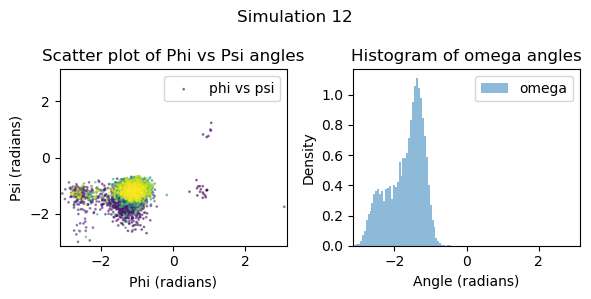

dcdplugin) Warning: DCD header claims 16658 frames, file size indicates there are actually 16662 frames


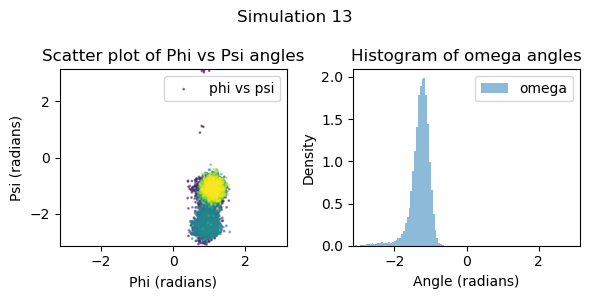

In [22]:
for i in range(1, nsims):
    sim_path = base_path + f"sim_{i:03d}/"
    traj_file = sim_path + "traj.dcd"
    top_file = base_path + "../protein_only.pdb"
    rama_plots = base_path + f"plots/ramachadran/"
    os.makedirs(rama_plots, exist_ok=True)

    traj_protein = md.load(traj_file, top=top_file)

    # === Extract torsion angles ===
    # Backbone torsions: phi, psi, omega
    phi_indices, phi = md.compute_phi(traj_protein)
    psi_indices, psi = md.compute_psi(traj_protein)
    omega_indices, omega = md.compute_omega(traj_protein)

    # You can also extract sidechain torsions if needed:
    # chi1_indices, chi1 = md.compute_chi1(traj_protein)
    # chi2_indices, chi2 = md.compute_chi2(traj_protein)
    # etc.

    # === Combine torsions into one array ===
    # Each array is (n_frames, n_angles)
    torsion_traj = np.concatenate([phi, psi, omega], axis=1)

    # === Save to file ===
    np.save(sim_path + "torsion_trajectory.npy", torsion_traj)
    # Optional: save indices for reference
    np.savez(sim_path + "torsion_indices.npz", phi=phi_indices, psi=psi_indices, omega=omega_indices)

    # plot histogram of torsion_traj
    # plot phi and psi angles
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.scatter(torsion_traj[:, 0], torsion_traj[:, 1], c=np.arange(torsion_traj.shape[0]), cmap='viridis', alpha=0.5, s=1, label='phi vs psi')
    plt.xlabel('Phi (radians)')
    plt.ylabel('Psi (radians)')
    plt.title('Scatter plot of Phi vs Psi angles')
    plt.xlim(-np.pi, np.pi)
    plt.ylim(-np.pi, np.pi)
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.hist(torsion_traj[:, 2], bins=50, density=True, alpha=0.5, label='omega')
    plt.xlim(-np.pi, np.pi)
    plt.xlabel('Angle (radians)')
    plt.ylabel('Density')
    plt.title('Histogram of omega angles')
    plt.legend()
    plt.suptitle(f"Simulation {i}")
    plt.tight_layout()
    plt.savefig(rama_plots + f"sim_{i}.png")
    plt.show()



In [23]:
torsion_traj.shape

(16662, 1107)